# Global Tech University Admissions Optimizer


---



* Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

* Reading the file.

In [3]:
df=pd.read_csv("/content/Admission_Predict.csv")
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

* Dataset Exploration for detailed insights.

In [3]:
print("Shape of Data\n")
print(df.shape)
print('------------------------------------------------------------')

print("\nInfo. of Data\n")
display(df.info())
print('------------------------------------------------------------')

print("\nValue count in data\n")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")


Shape of Data

(400, 9)
------------------------------------------------------------

Info. of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


None

------------------------------------------------------------

Value count in data


Value count in Serial No.
Serial No.
384    1
383    1
382    1
381    1
380    1
      ..
5      1
4      1
3      1
2      1
1      1
Name: count, Length: 400, dtype: int64
----------------------------------------------------------

Value count in GRE Score
GRE Score
324    19
312    19
322    14
314    14
316    14
325    13
321    13
327    12
311    12
320    12
317    12
308    11
313    11
326    11
323    10
315    10
319     9
300     9
329     9
318     9
304     8
307     8
331     8
340     8
305     8
301     8
310     8
299     8
334     7
298     7
309     6
330     6
328     6
306     6
332     6
296     5
302     5
336     5
303     5
338     4
295     4
333     4
297     4
335     4
339     3
290     2
294     2
337     1
293     1
Name: count, dtype: int64
----------------------------------------------------------

Value count in TOEFL Score
TOEFL Score
110    37
105    28
107    26
1

***Understanding the types of features and target***:

1. **GRE score:** Continous, numerical values between range of 260-340.
2. **TOEFL**: Continous,numerical values between range of 0-120.
3. **University Rating**:	Categorical (Ordinal), integers (1–5) representing rating levels.
4. **SOP**:	Categorical (Ordinal)	 ,values between 1-5 representing Statement of purpose quality.
5. **LOR**:	Categorical (Ordinal)	Letter of Recommendation strength, also likely 1–5.
6. **CGPA**: Continous, values on scale of 1-10 measured continously.
7. **Research**: Categorical(Binary),0 and 1.
8. **Chance of admit**: Continous, numbers between 0-1,indicating probability.


---

* *All datatypes of respective columns are correct*


* Statistical Summary

In [4]:
df.describe()
#min and max values of all columns lies between their respective standard ranges ,thus not indicating any invalid input.

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

* Checking for duplicates and missing values

In [ ]:
df.duplicated()
# no duplicates found

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
df.isnull().sum()
# no null values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* Dropping **Serial Number**:


In [4]:
df.drop(["Serial No."], axis=1, inplace=True)
df

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
395              0.82  
396              0.84  
397              0.91  
398              0.67  
399              0.95  

[400 rows x 8 columns]

* Checking for outliers

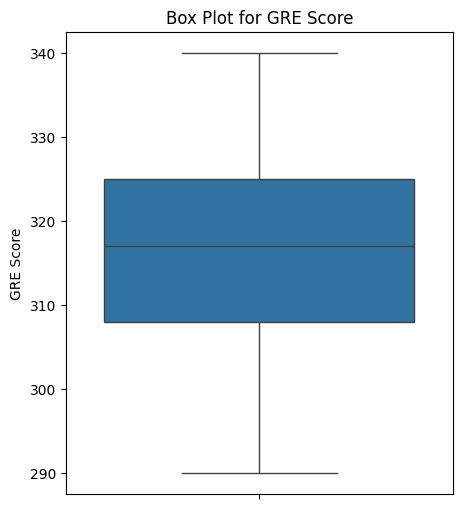

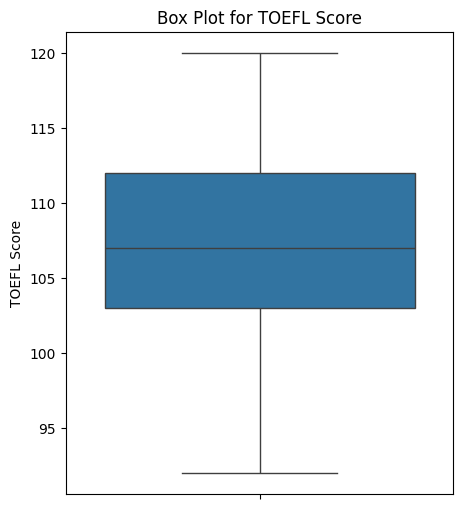

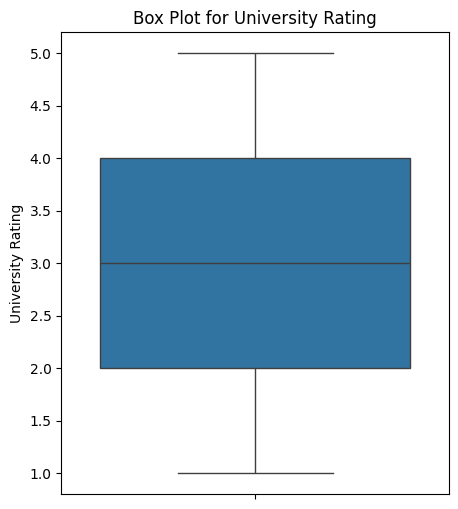

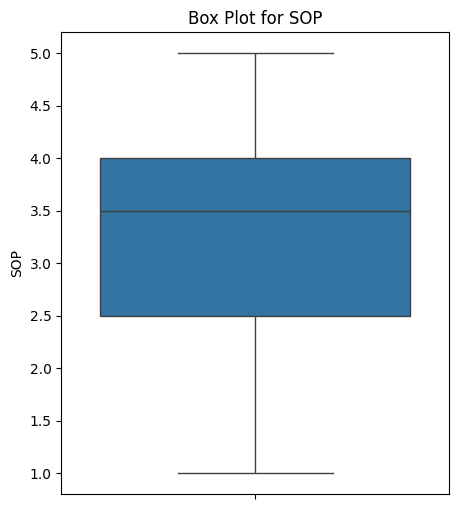

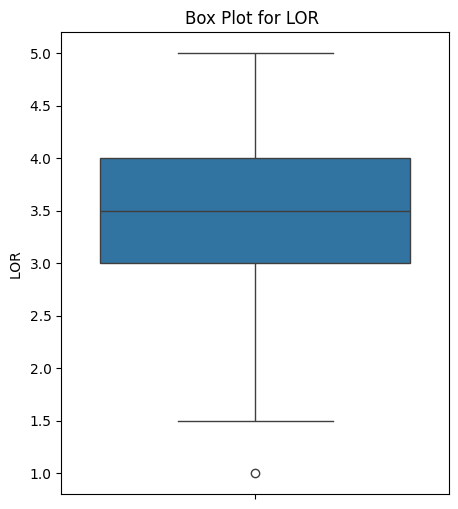

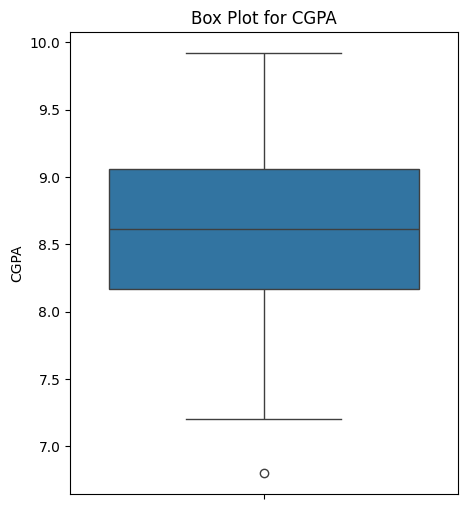

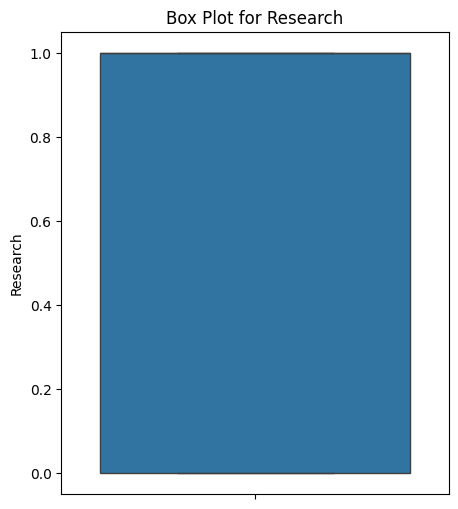

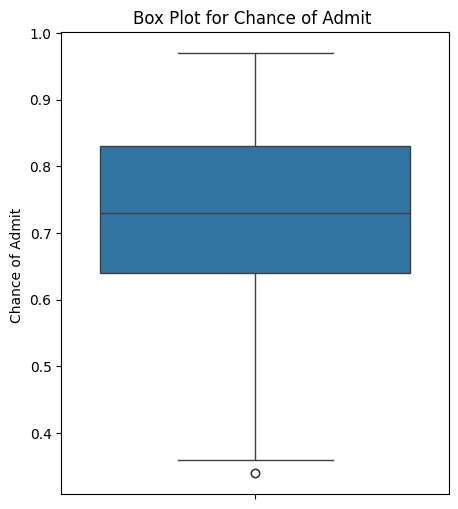

In [ ]:
for col in df.columns:
    plt.figure(figsize=(5, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

* Outliers in categorical columns need not be dealt with, because of its representation of ordinal setup.

* Checking the outlier both in *LOR* and *CGPA* to comprehend its presence.

In [ ]:
#check row with less than 7 cgpa
df[df["CGPA"] < 7]

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
58        300           99                  1  3.0   2.0   6.8         1   

    Chance of Admit   
58              0.36

In [ ]:
#check the row with 1 lor
df[df["LOR "] == 1]

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
347        299           94                  1  1.0   1.0  7.34         0   

     Chance of Admit   
347              0.42

* *6.8 is not an outlier,it reflects a real applicant profile,thus keeping it seems to be a sensible option.*


---



* Checking data inconsistencies in Categorical column

In [ ]:
print(df["Research"].unique())
print(df["University Rating"].unique())
# values lies in  their correct respective range

[1 0]
[4 3 2 5 1]


* Visualization


---

1. Data Distribution in Numerical Columns

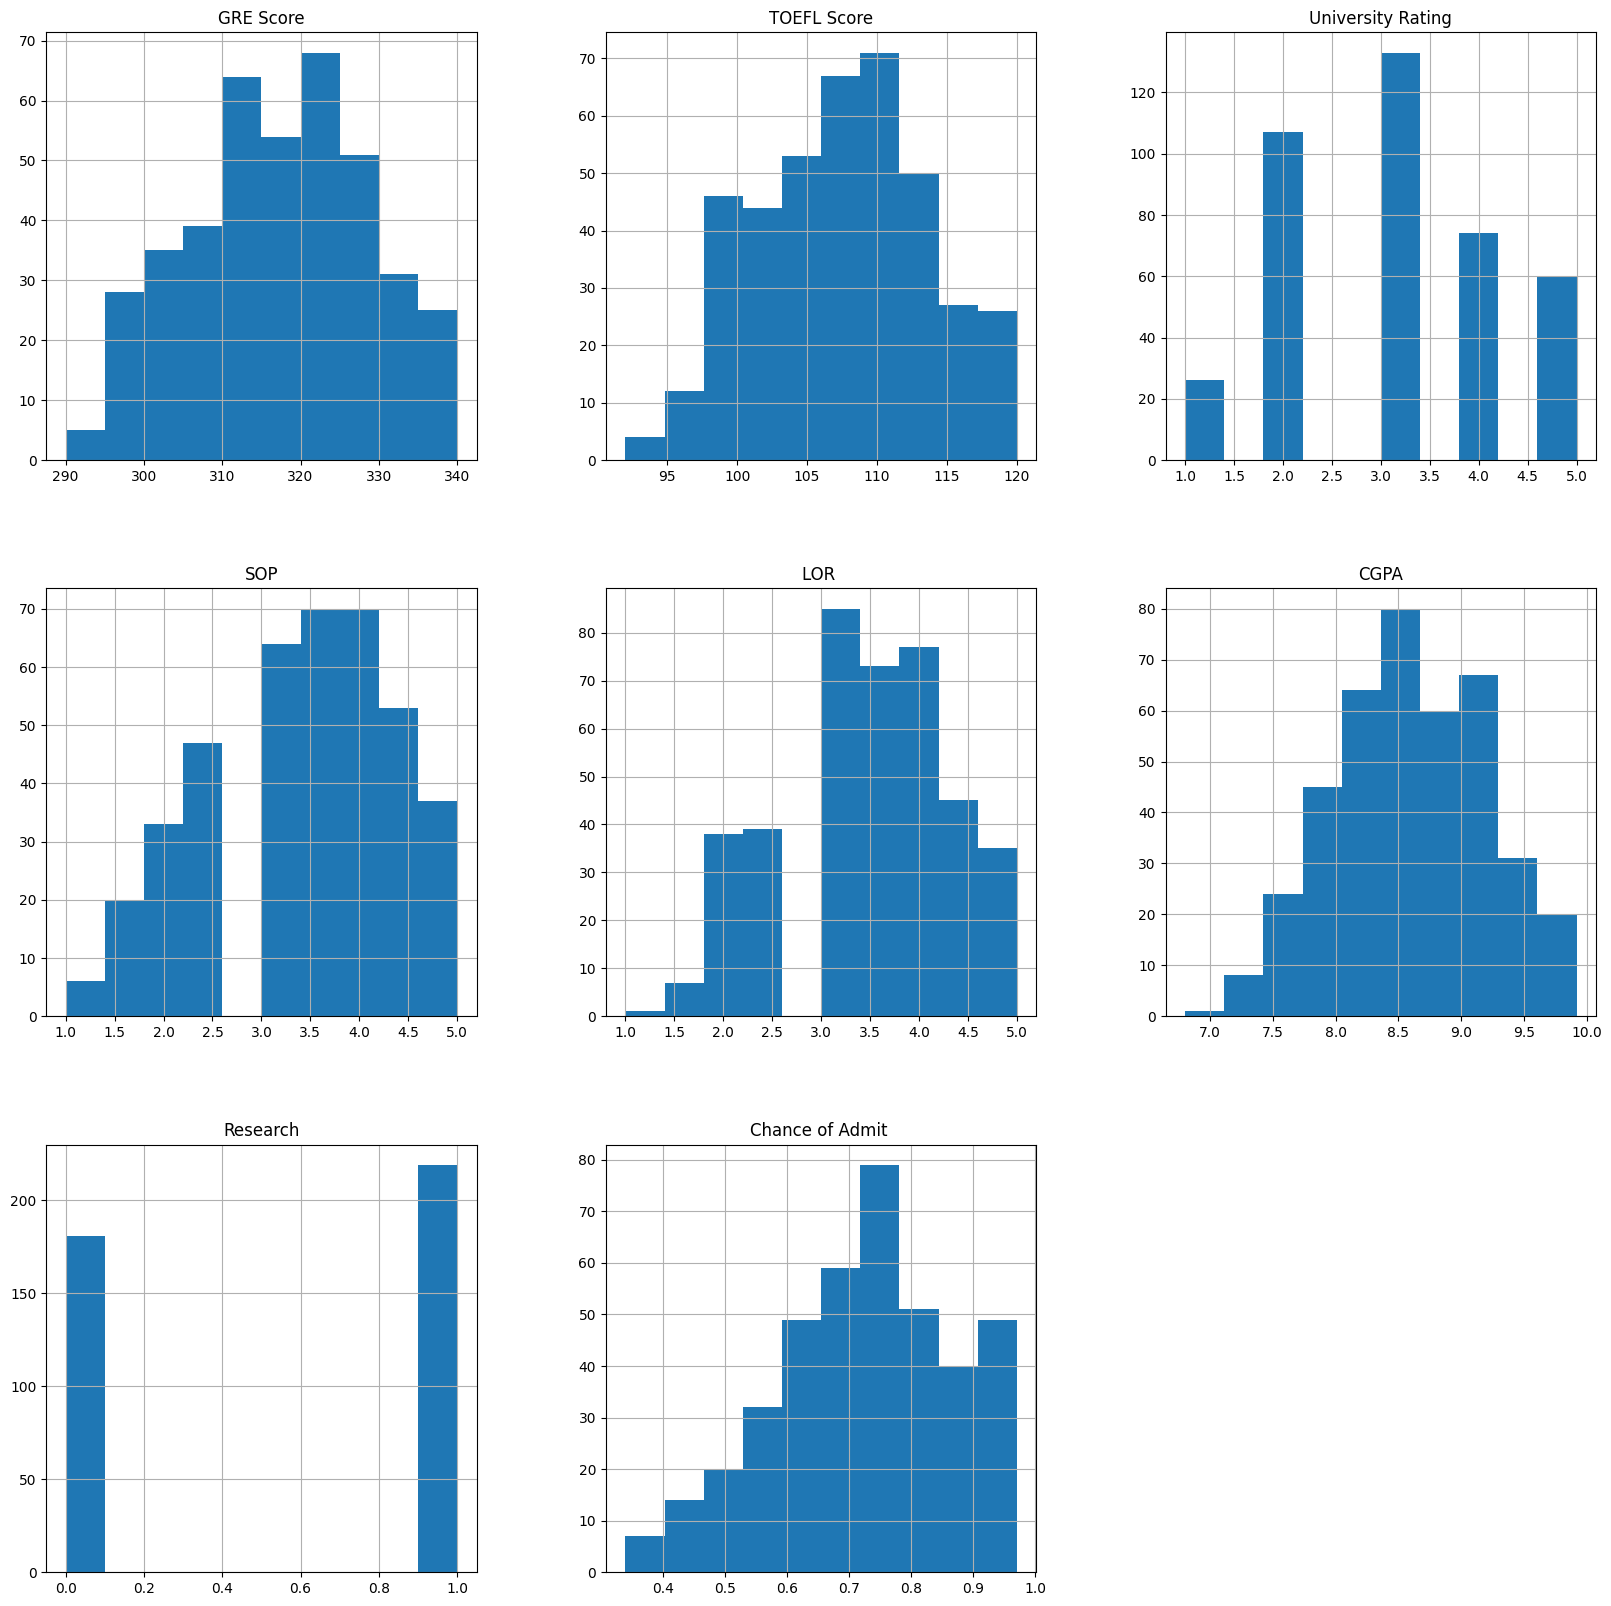

In [ ]:
df.hist(figsize=(20,20))
plt.show()

 *1. CGPA is slightly peaked with fairly normal distribution.*

*2. TOEFL score is slightly left skewed,however students with higher marks is not a concern.*

*3. University rating does not have uniform distribution.*

*4.SOP is 	Ordinal / Discrete*.

*5.LOR	is Ordinal / Discrete.*

*6.CGPA	Normal distribution.*

*7.Research is	Binary / Categorical.*

*8. Chance of Admit is 	Right-skewed (positively skewed).*


---



2. Visualisation for linearity with 'Chance of admission.'

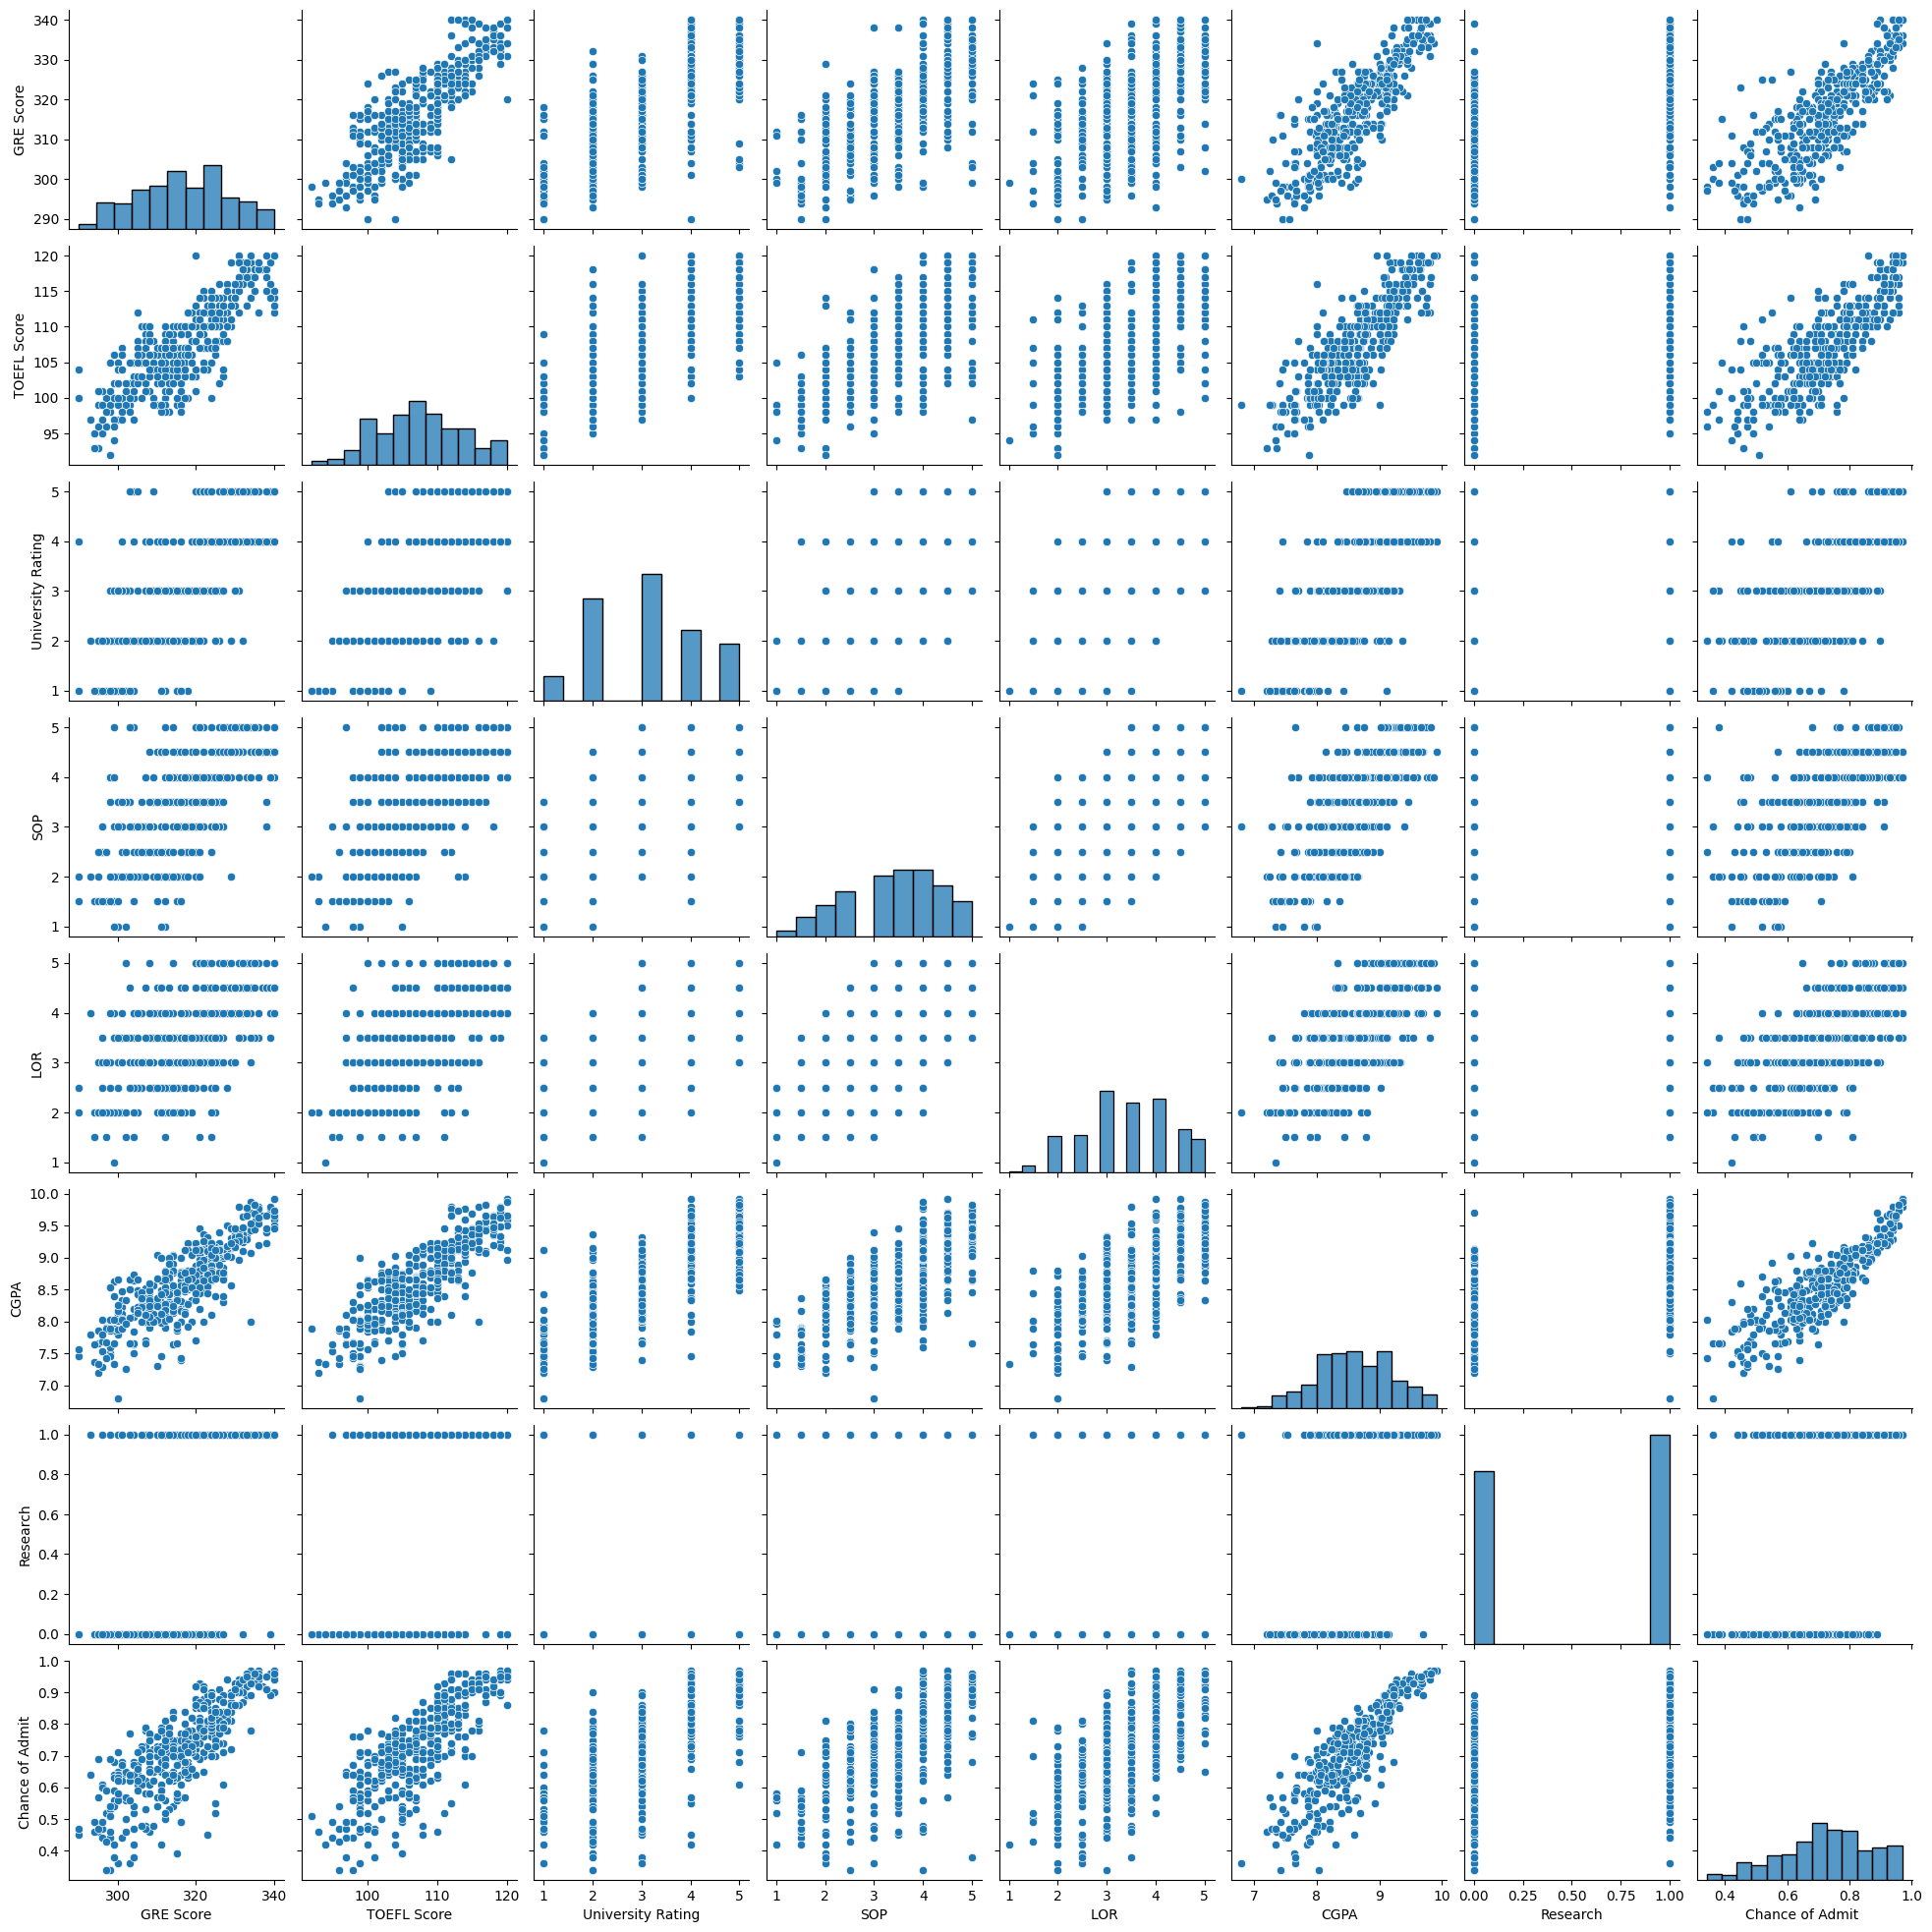

In [ ]:
sns.pairplot(df)
plt.show()

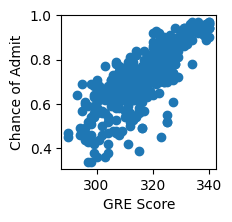

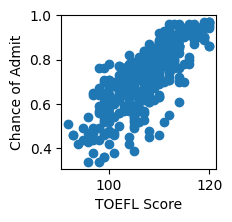

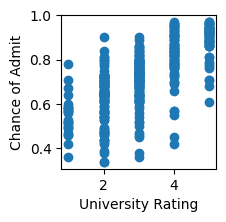

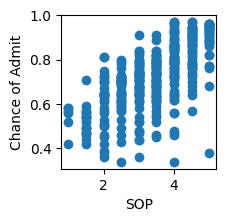

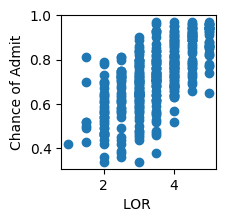

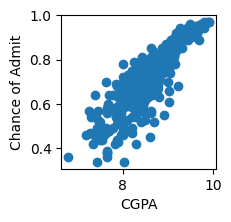

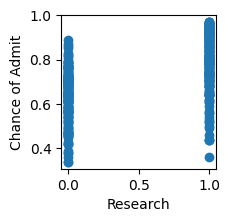

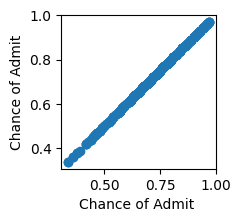

In [ ]:
# scatter plot
for a in df.columns:
  plt.figure(figsize=(2,2))
  plt.scatter(df[a], df["Chance of Admit "])
  plt.xlabel(a)
  plt.ylabel("Chance of Admit")
  plt.show()

*There is a linear relationship between  Chance of Admit and several other variables based on the scatter plots, the Chance of Admit increases as GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research involvement increase.*


---

3. Heatmap to understand correlation

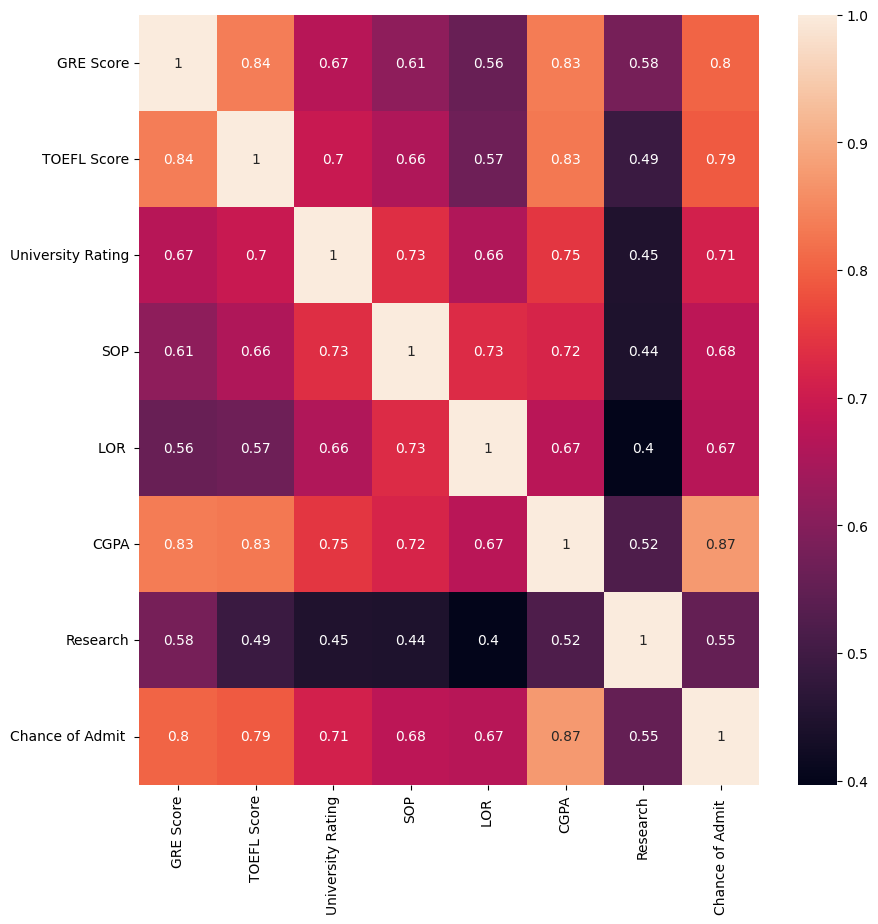

In [ ]:
#heat map of the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

* *TOEFL,CGPA and GRE are highly correlated,thus making linear model a bad choice since their effects on the dependent variable are not independently identifiable.*
* *Random Forest and Decision Tree is more sensible option,and it will provide a white box understanding of predictions.*
--------------------------

* **Scaling of all data except chance of admission.**


---------------------------------------------------
1. *Using min-max scaling makes the feature ranges compatible with the target variable range(0 and 1).*
2. *Many features ( GRE, TOEFL, CGPA) are not perfectly Gaussian,which makes it a poor candidate for standardisation.*


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled[0]

array([0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
       0.91346154, 1.        , 0.92063492])

In [6]:

#converting the response back to data frame
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  \
0         0.94     0.928571               0.75  0.875  0.875  0.913462   
1         0.68     0.535714               0.75  0.750  0.875  0.663462   
2         0.52     0.428571               0.50  0.500  0.625  0.384615   
3         0.64     0.642857               0.50  0.625  0.375  0.599359   
4         0.48     0.392857               0.25  0.250  0.500  0.451923   
..         ...          ...                ...    ...    ...       ...   
395       0.68     0.642857               0.50  0.625  0.625  0.717949   
396       0.70     0.535714               0.50  0.500  0.625  0.740385   
397       0.80     0.857143               0.75  1.000  0.875  0.849359   
398       0.44     0.392857               0.50  0.625  0.750  0.634615   
399       0.86     0.892857               0.75  1.000  0.750  0.916667   

     Research  Chance of Admit   
0         1.0          0.920635  
1         1.0          0.666667  
2         1.0          0.603175  
3         1.0          0.730159  
4         0.0          0.492063  
..        ...               ...  
395       1.0          0.761905  
396       1.0          0.793651  
397       1.0          0.904762  
398       0.0          0.523810  
399       1.0          0.968254  

[400 rows x 8 columns]

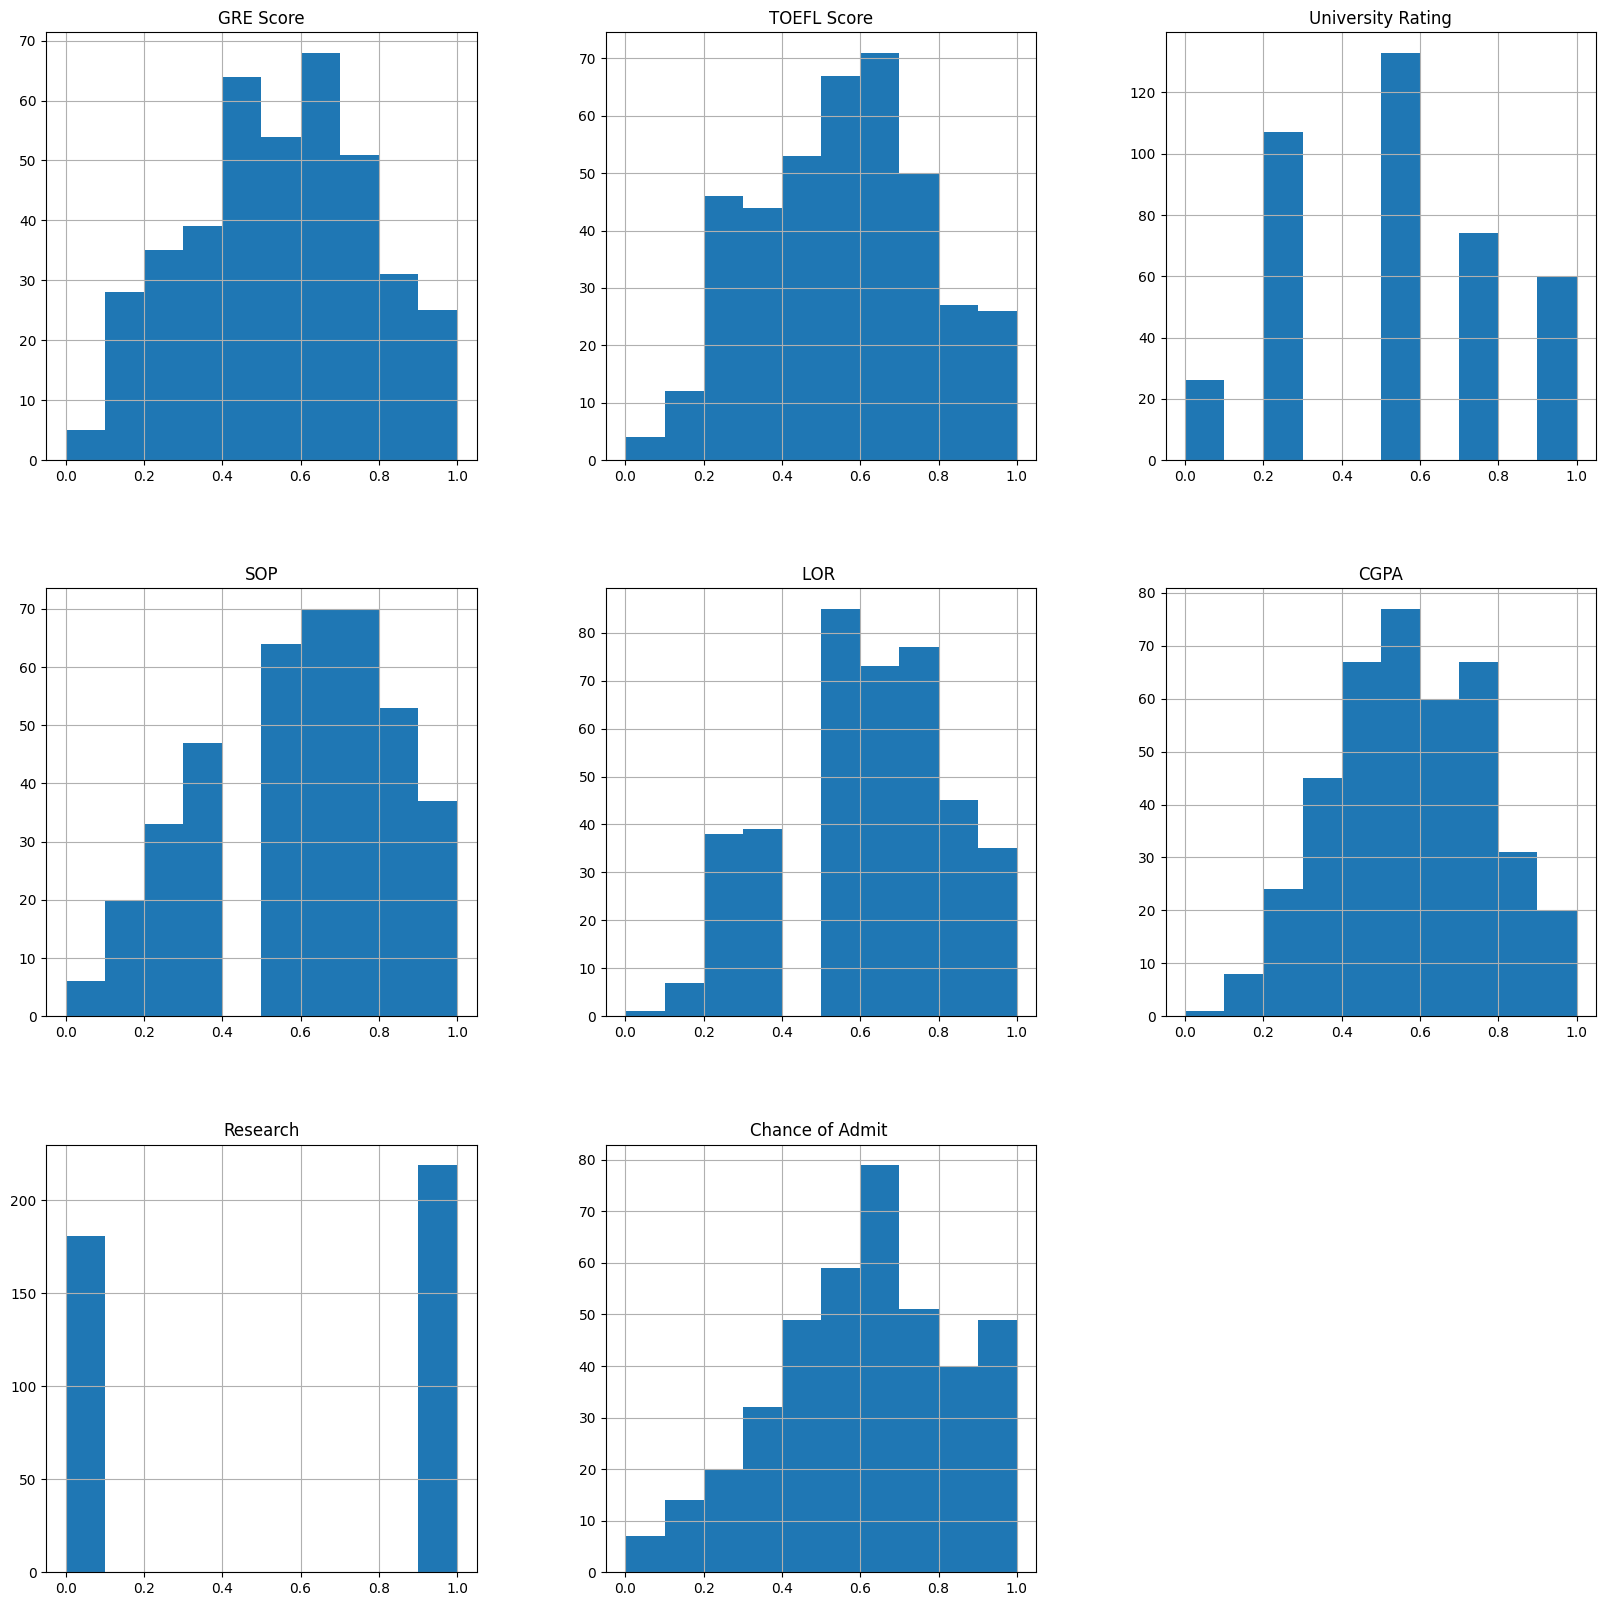

In [ ]:
#historgram of scaled data
df_scaled.hist(figsize=(20,20))
plt.show()

*Scaling maintained the shape of all features*


---



#  Modeling Multiple Regression
------------

* Separating Features and Target

*Some tools and operations (like StandardScaler) expect a 2D column vector rather than a 1D array. Reshaping ensures compatibility*

In [8]:
X= df.drop(["Chance of Admit "], axis=1)
print("Before resphape:\nX:", X.shape)
y = df["Chance of Admit "].values.reshape(-1,1)
print("After resphape:\nX:", X.shape)
print("Y:", y.shape)

Before resphape:
X: (400, 7)
After resphape:
X: (400, 7)
Y: (400, 1)


* Scaling features using standard scaler

In [9]:
Scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

*  Check Multicollinearity (VIF)

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant for statsmodels
X_const = sm.add_constant(X_scaled)

# VIF to detect multicollinearity
vif = pd.DataFrame()
vif["Variable"] = [f"x{i}" for i in range(X_const.shape[1])]
vif["VIF"] = [variance_inflation_factor(X_const, i) for i in range(X_const.shape[1])]
print(vif)

  Variable        VIF
0       x0  12.507203
1       x1   4.615516
2       x2   4.288959
3       x3   2.919606
4       x4   3.075504
5       x5   2.431258
6       x6   5.207403
7       x7   1.543312


In [11]:
X.columns

for i, col in enumerate(X.columns):
    print(f"x{i}: {col}")

x0: GRE Score
x1: TOEFL Score
x2: University Rating
x3: SOP
x4: LOR 
x5: CGPA
x6: Research


*GRE Score, TOEFL Score, and University Rating are highly correlated, considering top-tier universities aims for high-scoring applicants.*

* Train-Test Split

* **Data split to Train and Test set, 80:20 ratio**
* **Fitting Train set into Linear Regression Model**

In [12]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(X_train,y_train)

LinearRegression()

* **Model Evaluation**

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = multiple_linear_regression.predict(X_test) #testing- unknown

print("--------------------Result for Linear Regression----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

--------------------Result for Linear Regression----------------------------------------------
MSE: 0.004617003377285013
RMSE: 0.0679485347692282
MAE: 0.04795673362091198
R² Score: 0.8212082591486991


* **Assessing if Model is Underfiting or Overfitting**

In [14]:
y_pred_training = multiple_linear_regression.predict(X_train)
print("R² training Score:", r2_score(y_train, y_pred_training))
print("R² test Score:", r2_score(y_test, y_pred))


R² training Score: 0.7951946003191086
R² test Score: 0.8212082591486993


*Not a significant difference between the R2 score, indicating that the Model generalizes well and captures true relationship.*


---



* Testing model on an independent input

In [18]:
import numpy as np
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-1.0972817]])

* *Since the target variable is the “chance of admission” and it should lie between 0 and 1, a prediction of -1.097 is clearly invalid. *

* Regularized Regression (Ridge )

Ridge is best option here since all the highly correlated features are crucial for target prediction.

In [18]:
from sklearn.linear_model import LinearRegression, Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

* Model evaluation after Ridge Regression.

In [22]:
print("\nRidge Regression Results:\n")
print("R² Score:", r2_score(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))



Ridge Regression Results:

R² Score: 0.8128626347418407
MSE: 0.004832515435552086


*The multicollinearity is moderate,hence ridge regression didn't improve the r2 score.*


---



# Modeling Decision Tree
* Importing Decision Tree library and fitting data .

In [23]:
from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

* Testing on Test set

In [24]:
y_head_dtr = tree_reg.predict(X_test)
y_head_dtr

array([0.54, 0.73, 0.94, 0.81, 0.34, 0.91, 0.59, 0.38, 0.7 , 0.91, 0.79,
       0.93, 0.49, 0.88, 0.76, 0.75, 0.69, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.76, 0.71, 0.67, 0.69, 0.84, 0.76, 0.94, 0.48,
       0.44, 0.72, 0.67, 0.72, 0.79, 0.73, 0.93, 0.76, 0.65, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.93, 0.91, 0.92, 0.72, 0.8 , 0.95, 0.49,
       0.68, 0.72, 0.83, 0.34, 0.88, 0.61, 0.62, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.85, 0.75, 0.84, 0.93, 0.9 , 0.52, 0.76, 0.75,
       0.5 , 0.87, 0.87])

* Model Evaluation

In [25]:
print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

--------------------Result for DT----------------------------------------------
MSE for DT: 0.009492500000000001
RMSE for DT: 0.09742946166329772
MAE for DT: 0.0655
R² Score for DT: 0.6324064633825357


* Assessing if Model is Underfiting or Overfitting

In [44]:
y_pred_training_dt = tree_reg.predict(X_train)
print("R² training Score:", r2_score(y_train, y_pred_training_dt))
print("R² test Score:", r2_score(y_test, y_head_dtr))

R² training Score: 1.0
R² test Score: 0.6324064633825357


*Training R² = 1.0: Model memorized the training data.*

*Testing R² = 0.63: Model performs poorly on unseen data.*

***The model is exhibiting severe overfitting***

* Hyperparameter Tuning

In [29]:
#using grid searchCV to get best parameters for decision tree regressor


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20,25,35],
    'min_samples_split': [2, 3,4,5,6,7, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(tree_reg, cv=5, param_grid=param)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_split=20, splitter='random')
Best Score (R2): 0.7048298588253996
Test Score (R2): 0.748145977584347


* Visualize decision tree

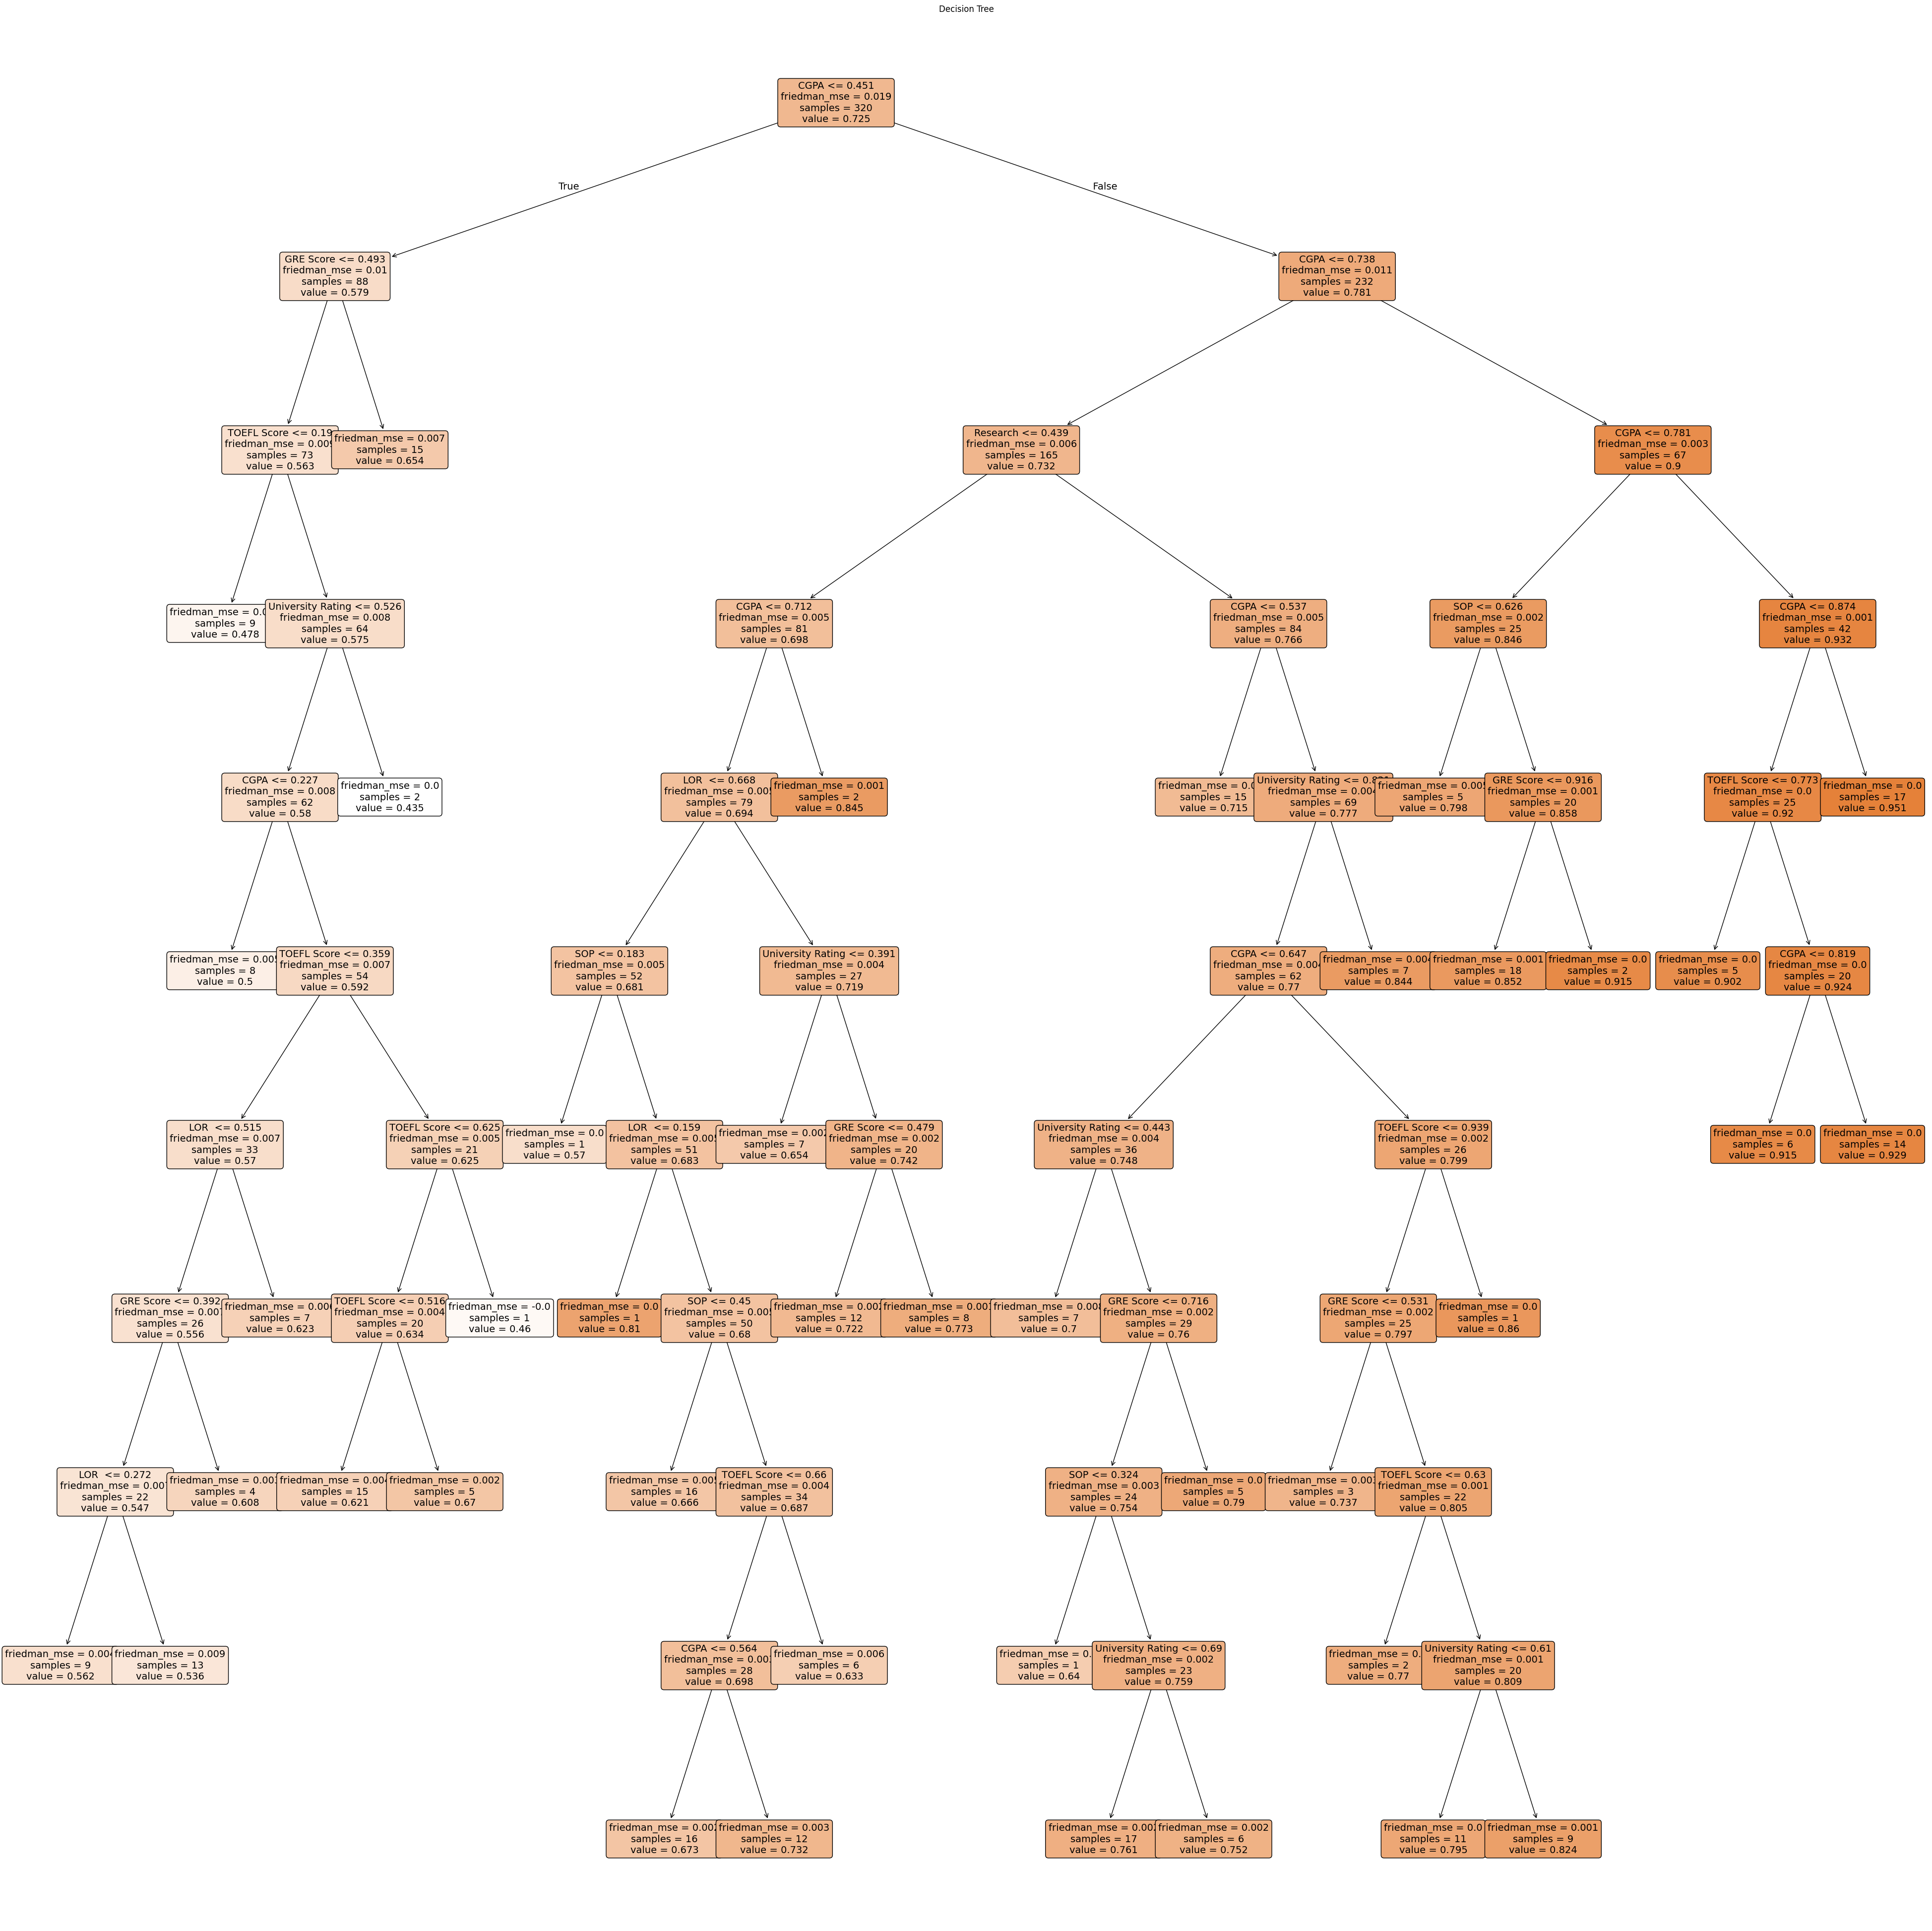

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
a = plot_tree(best_model,
              feature_names=X.columns,
              class_names=y,
              filled=True,
              rounded=True,
              fontsize=14)
plt.title("Decision Tree")
plt.show()

* Prediction after Ridge regression for LR and Hyperparameter tuning for DT

In [34]:
print("--------------------Prediction with LR----------------------------------------------")
c=np.array([.5,.3,.58,.68,.98,.78,1]).reshape(1, -1)
b=multiple_linear_regression.predict(c)
print(b)
print("--------------------Prediction with DT----------------------------------------------")
b1=best_model.predict(c)
print(b1)


--------------------Prediction with LR----------------------------------------------
[[0.8119449]]
--------------------Prediction with DT----------------------------------------------
[0.85166667]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


*The Decision Tree model predicted a slightly higher chance*

# Modeling Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [38]:
random_forest_reg.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [40]:
y_rf=random_forest_reg.predict(X_test)
y_rf

array([0.6652, 0.7245, 0.9401, 0.8151, 0.5838, 0.9179, 0.5767, 0.4608,
       0.6788, 0.9058, 0.7177, 0.9394, 0.5168, 0.8991, 0.7219, 0.6705,
       0.7116, 0.4769, 0.7094, 0.9599, 0.619 , 0.6773, 0.703 , 0.5552,
       0.9441, 0.8009, 0.7313, 0.5791, 0.7106, 0.807 , 0.804 , 0.9429,
       0.6369, 0.466 , 0.7052, 0.6667, 0.7009, 0.6891, 0.6302, 0.9235,
       0.7489, 0.6445, 0.7606, 0.9493, 0.8806, 0.8403, 0.9645, 0.654 ,
       0.9336, 0.8937, 0.9103, 0.7086, 0.763 , 0.9437, 0.5723, 0.589 ,
       0.6906, 0.8427, 0.5732, 0.8732, 0.6368, 0.6464, 0.6788, 0.4532,
       0.6756, 0.6432, 0.6094, 0.8628, 0.8849, 0.775 , 0.6967, 0.821 ,
       0.9225, 0.8596, 0.5443, 0.7414, 0.6915, 0.5508, 0.8419, 0.7722])

In [42]:
print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

--------------------Result for RF----------------------------------------------
MSE for DT: 0.004954301749999999
RMSE for DT: 0.07038680096438535
MAE for DT: 0.049725000000000054
R² Score for DT: 0.8081465049510043


* Assessing if Model is Underfiting or Overfitting

In [43]:
y_pred_training_rf=random_forest_reg.predict(X_train)
print("R² training Score:", r2_score(y_train, y_pred_training_rf))
print("R² test Score:", r2_score(y_test, y_rf))

R² training Score: 0.9633229373965427
R² test Score: 0.8081465049510043


*~15% drop suggests mild overfitting*

* Tuning Hyper parameters using Randomized Search CV

In [50]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
# Defining hyperparameter
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='r2', n_jobs=-1)
random_search.fit(X_train, y_train.ravel())

print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model_rf = grid_search.best_estimator_
test_score_rf = best_model.score(X_test, y_test)
print("Test Score (R2):", test_score_rf)

Best Parameters: DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_split=20, splitter='random')
Best Score (R2): 0.7048298588253996
Test Score (R2): 0.748145977584347


* Visualising Random Forest

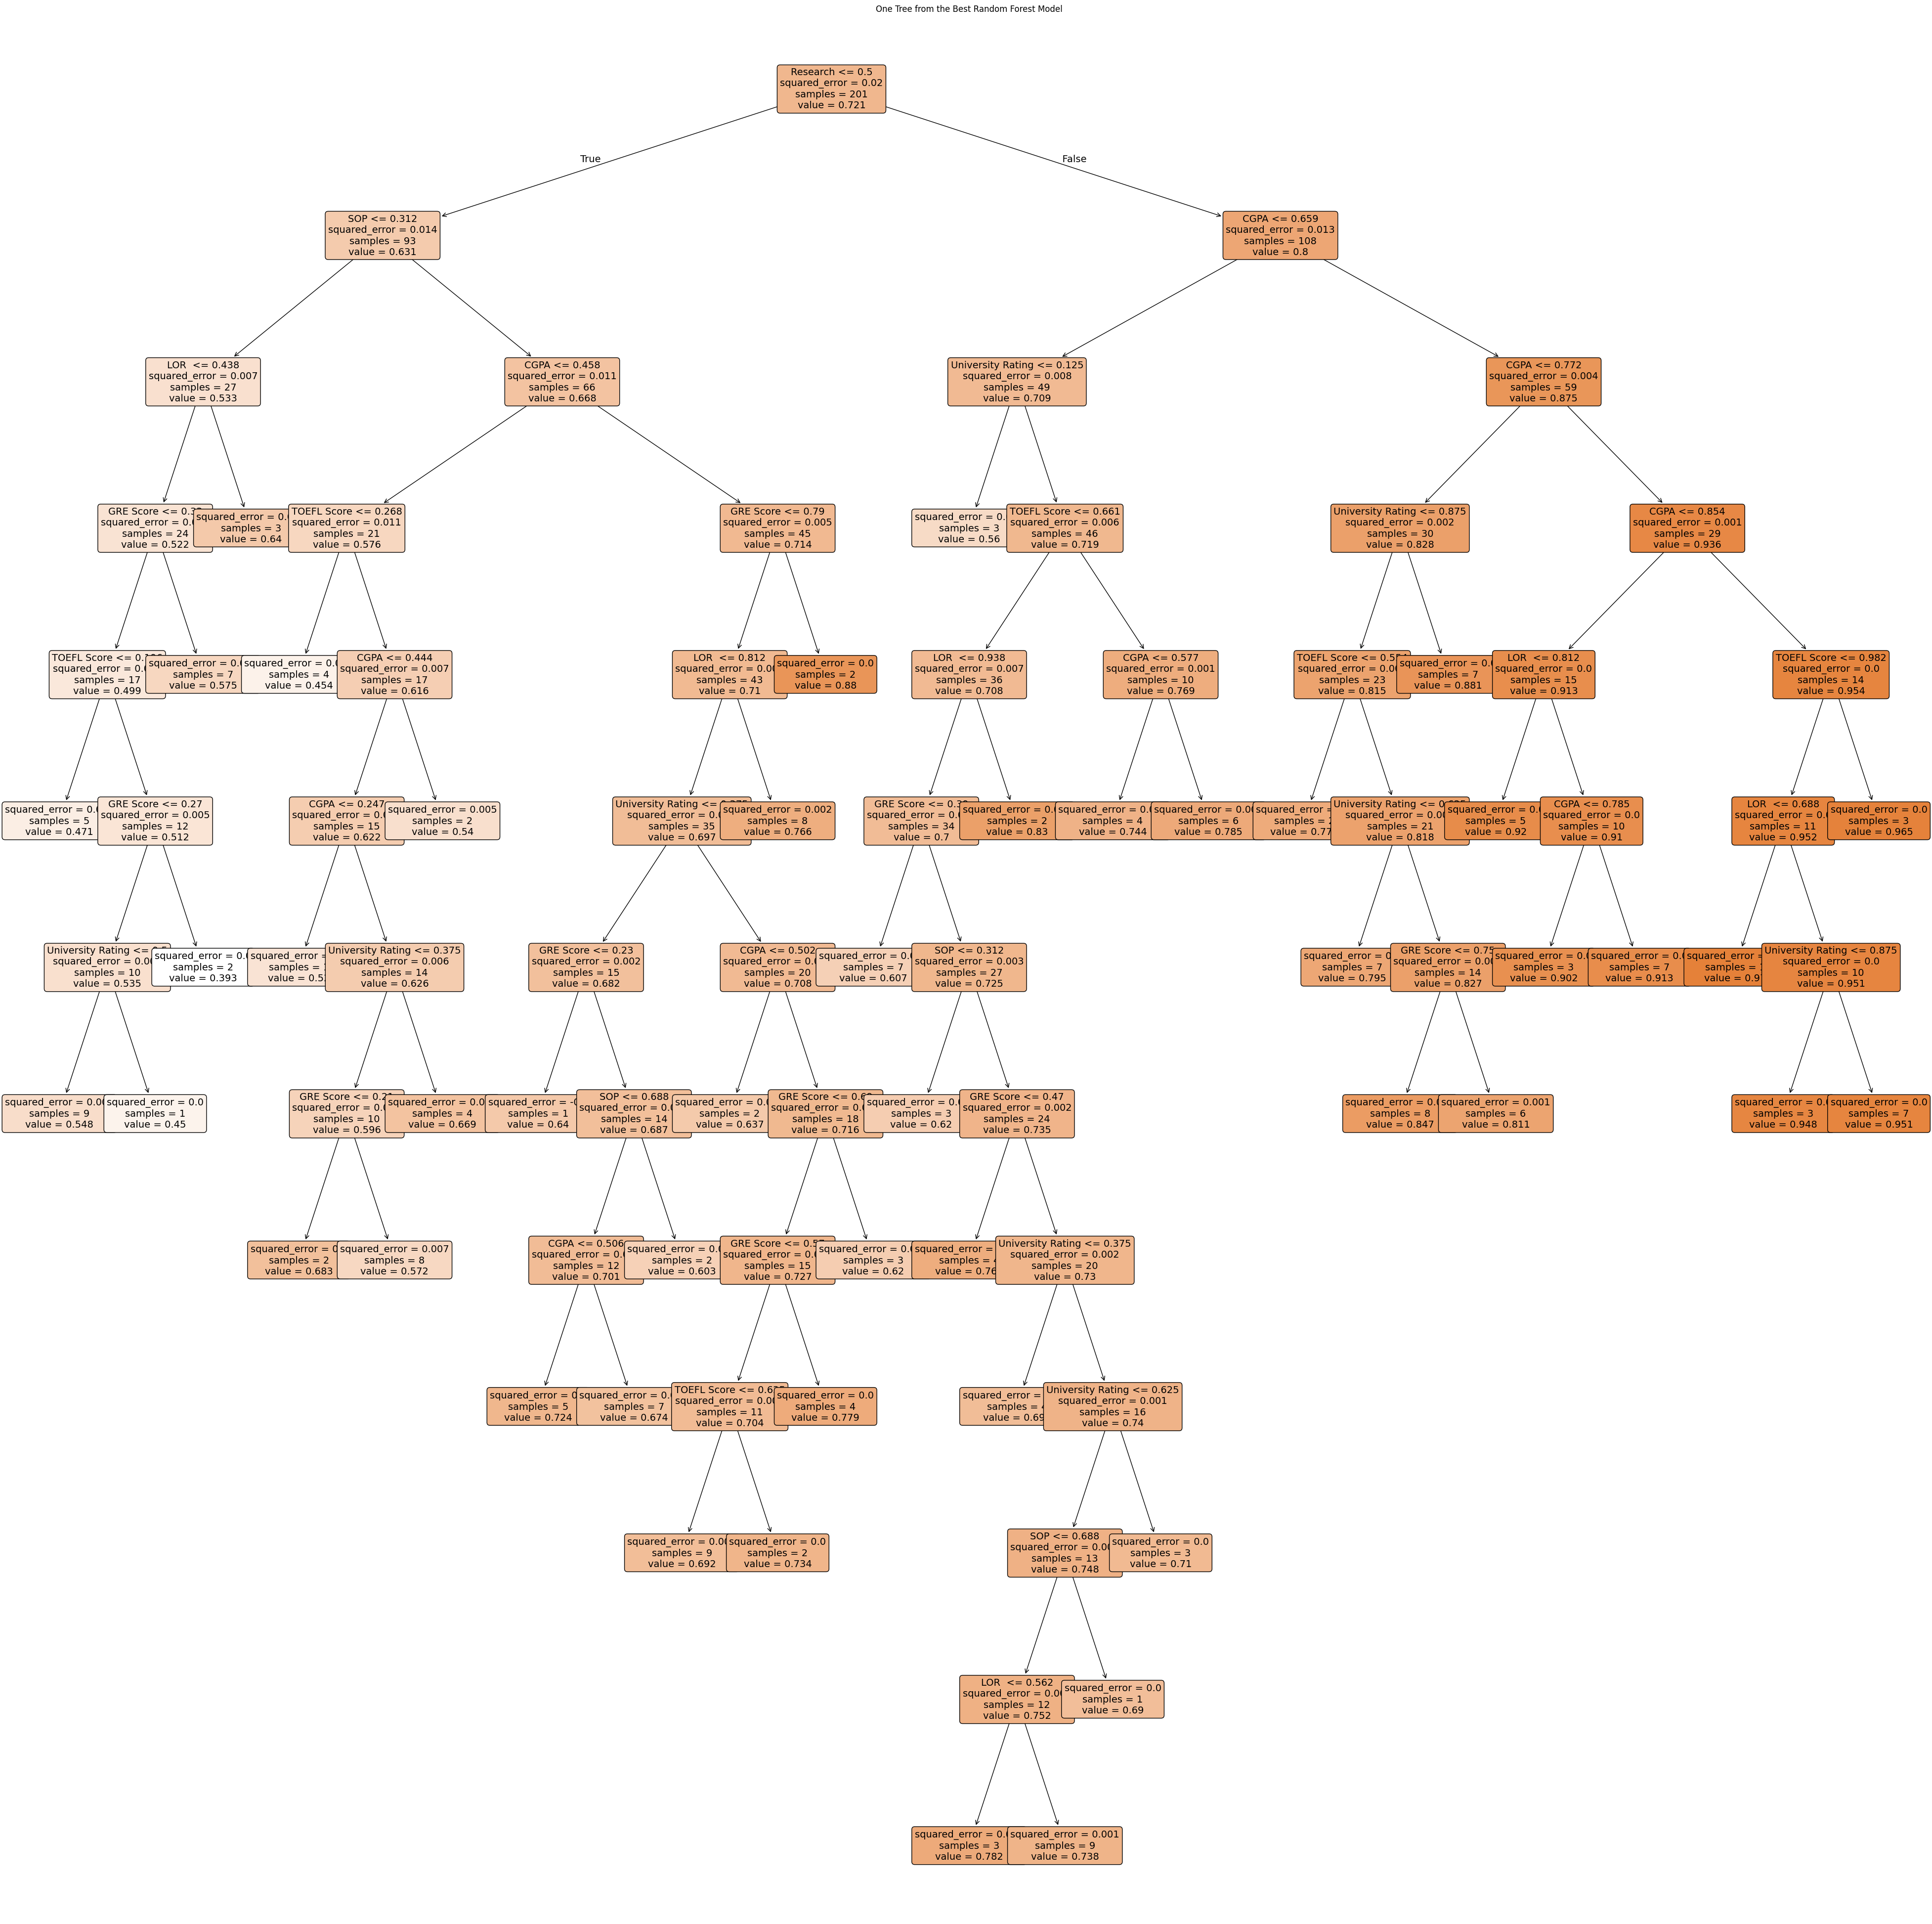

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
plot_tree(random_search.best_estimator_.estimators_[0],
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=14)
plt.title("One Tree from the Best Random Forest Model")
plt.show()



**Final Evaluation Report**

In [52]:
print("--------------------Result for Linear Regression----------------------------------------------")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("--------------------Result for LR after Ridge----------------------------------------------")
print("\nRidge Regression Results:\n")
print("R² Score:", r2_score(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))

print("--------------------Result for DT----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_head_dtr))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_head_dtr)))
print("MAE for DT:", mean_absolute_error(y_test, y_head_dtr))
print("R² Score for DT:", r2_score(y_test, y_head_dtr))

print("--------------------Result for DT after Hypertuning----------------------------------------------")
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score (R2):", test_score)

print("--------------------Result for RF----------------------------------------------")
print("MSE for DT:", mean_squared_error(y_test, y_rf))
print("RMSE for DT:", np.sqrt(mean_squared_error(y_test, y_rf)))
print("MAE for DT:", mean_absolute_error(y_test, y_rf))
print("R² Score for DT:", r2_score(y_test, y_rf))

print("--------------------Result for RF after Hypertuning----------------------------------------------")
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

--------------------Result for Linear Regression----------------------------------------------
MSE: 0.004617003377285013
RMSE: 0.0679485347692282
MAE: 0.04795673362091198
R² Score: 0.8212082591486991
--------------------Result for LR after Ridge----------------------------------------------

Ridge Regression Results:

R² Score: 0.8128626347418407
MSE: 0.004832515435552086
--------------------Result for DT----------------------------------------------
MSE for DT: 0.009492500000000001
RMSE for DT: 0.09742946166329772
MAE for DT: 0.0655
R² Score for DT: 0.6324064633825357
--------------------Result for DT after Hypertuning----------------------------------------------
Test Score (R2): 0.748145977584347
--------------------Result for RF----------------------------------------------
MSE for DT: 0.004954301749999999
RMSE for DT: 0.07038680096438535
MAE for DT: 0.049725000000000054
R² Score for DT: 0.8081465049510043
--------------------Result for RF after Hypertuning-------------------------

# Feature Selection-Based Modeling

Feature Importances:
 CGPA                 0.352491
GRE Score            0.204963
TOEFL Score          0.171839
University Rating    0.096832
SOP                  0.077941
LOR                  0.062116
Research             0.033818
dtype: float64


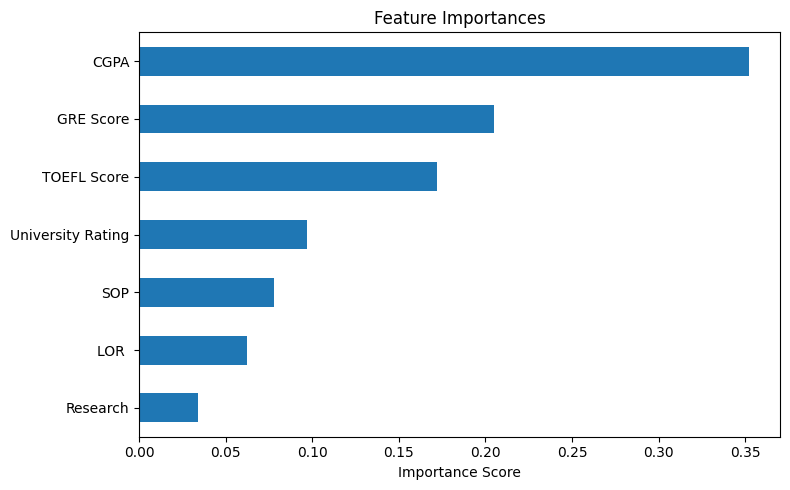

In [59]:

importances = pd.Series(random_search.best_estimator_.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)


print("Feature Importances:\n", importances_sorted)

# Plot
plt.figure(figsize=(8,5))
importances_sorted.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

**Retraining models with top 5 features**

* Random Forest

In [65]:
# Keeping top 5 features only
top_features = importances_sorted.head(5).index.tolist()

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf_top = RandomForestRegressor(random_state=42)
rf_top.fit(X_train_top, y_train)

print("R² with top 5 features:", rf_top.score(X_test_top, y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² with top 5 features: 0.7845390855542007


* Decision Tree

In [67]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_top, y_train)

# Predict
y_pred_dt = dt.predict(X_test_top)
print("Decision Tree R²:", r2_score(y_test, y_pred_dt))

Decision Tree R²: 0.5932461827499931


* Multiple Regression

In [66]:
lr = LinearRegression()
lr.fit(X_train_top, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test_top)
print("Multiple Linear Regression R²:", r2_score(y_test, y_pred_lr))


Multiple Linear Regression R²: 0.7982791182889647
